# Stock Market Analysis And Prediction using LSTM

## Installing Important Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## For reading stock data from yahoo

In [2]:
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr


## For time stamps

In [3]:
from datetime import datetime

## The tech stocks we'll use for this analysis

In [4]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [5]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN'] # Set up End and Start times for data grab

In [6]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-08-19,177.639999,178.300003,176.160004,178.220001,178.220001,31129800,AMAZON
2024-08-20,177.919998,179.009995,177.429993,178.880005,178.880005,26255200,AMAZON
2024-08-21,179.919998,182.389999,178.889999,180.110001,180.110001,35599100,AMAZON
2024-08-22,181.380005,181.470001,175.679993,176.130005,176.130005,32047500,AMAZON
2024-08-23,177.339996,178.970001,175.240005,177.039993,177.039993,29150100,AMAZON
2024-08-26,176.699997,177.470001,174.300003,175.500000,175.500000,22366200,AMAZON
2024-08-27,174.149994,174.889999,172.250000,173.119995,173.119995,29842000,AMAZON
2024-08-28,173.690002,173.690002,168.919998,170.800003,170.800003,29045000,AMAZON
2024-08-29,173.220001,174.289993,170.809998,172.119995,172.119995,26407800,AMAZON


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,190.401240,192.177520,188.792080,190.561560,190.042519,5.996215e+07
std,18.462315,18.720541,18.097669,18.450160,18.616481,2.515027e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,175.400002,177.347504,173.830006,175.552505,174.706818,4.618965e+07
50%,186.949997,188.205002,184.904999,186.629997,186.109131,5.353515e+07
75%,195.989998,197.047501,194.377499,195.884998,195.520020,6.600965e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,2.464214e+08


In [9]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,152.965052,154.524892,151.624604,153.127840,153.000025,2.064389e+07
std,18.027952,18.183345,17.883948,17.984901,18.023230,8.250424e+06
min,124.029999,124.440002,121.459999,123.400002,123.259735,7.409100e+06
25%,137.992504,139.209503,136.897503,138.130005,137.973003,1.599652e+07
50%,147.544998,148.449997,146.714996,147.815002,147.646988,1.844240e+07
75%,168.972496,170.132504,166.525005,168.890003,168.768444,2.247792e+07
max,191.750000,193.309998,190.619995,192.660004,192.660004,5.972800e+07


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-09-05 to 2024-08-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

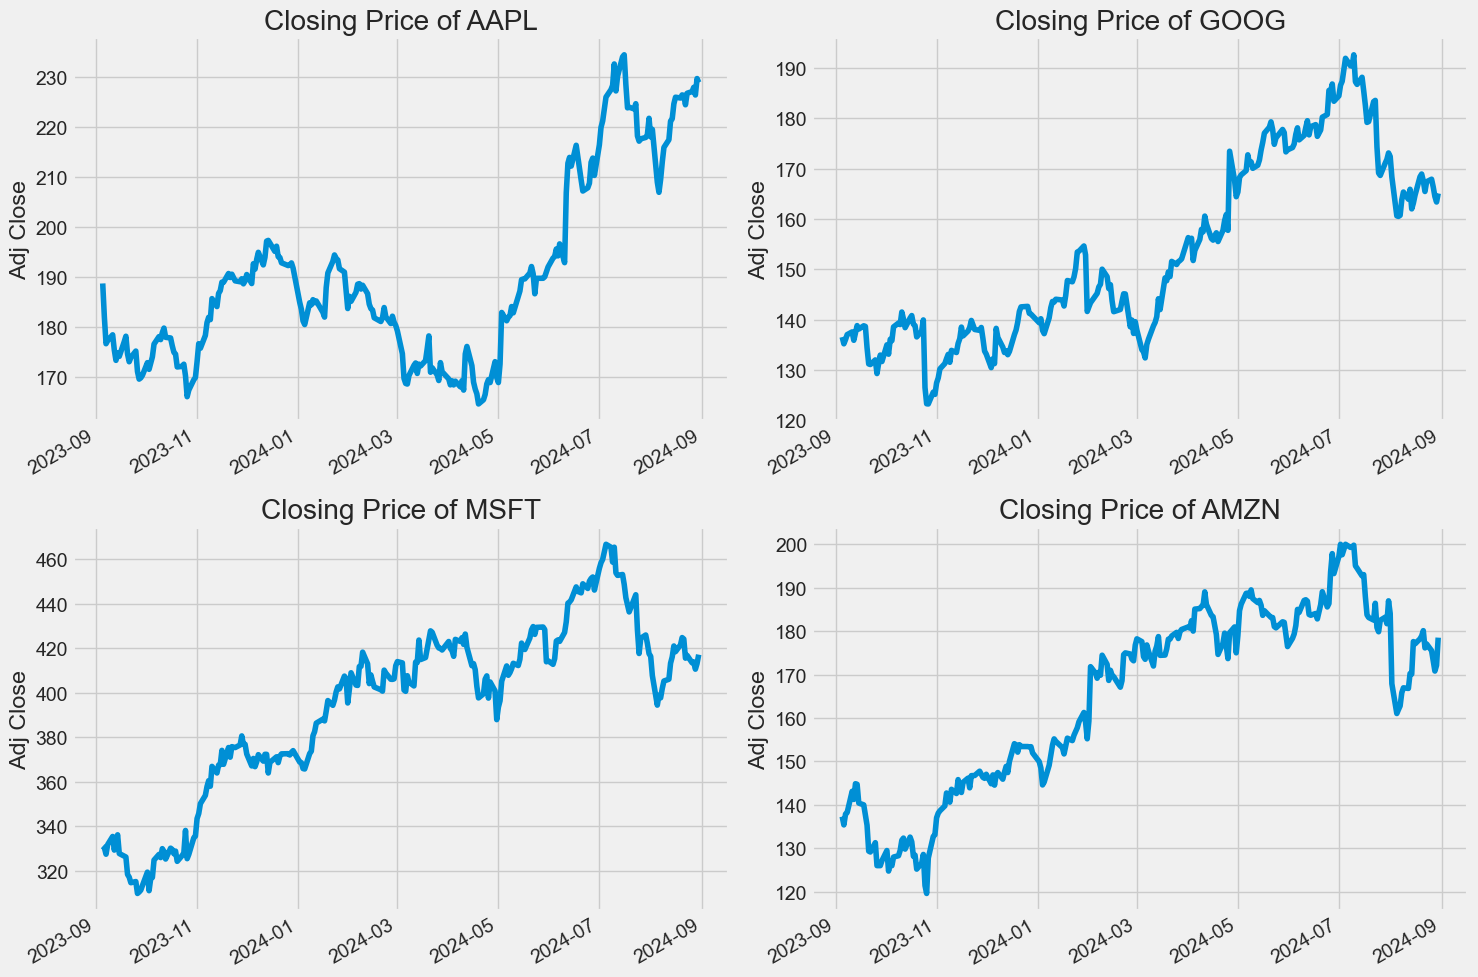

In [11]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales¶
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

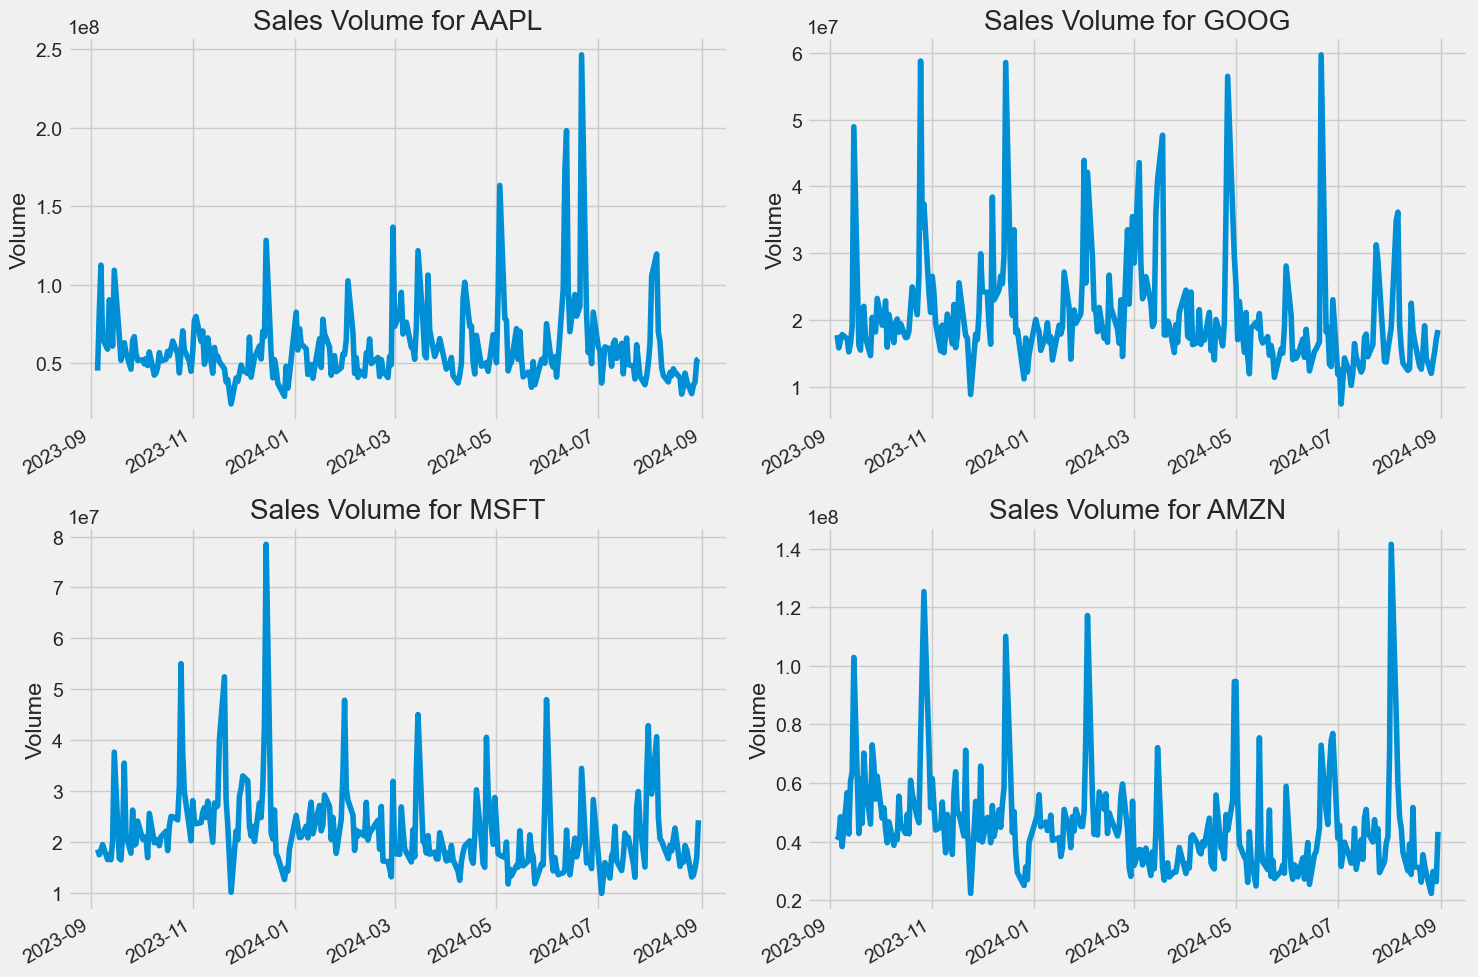

In [12]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## 2. What was the moving average of the various stocks?
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses

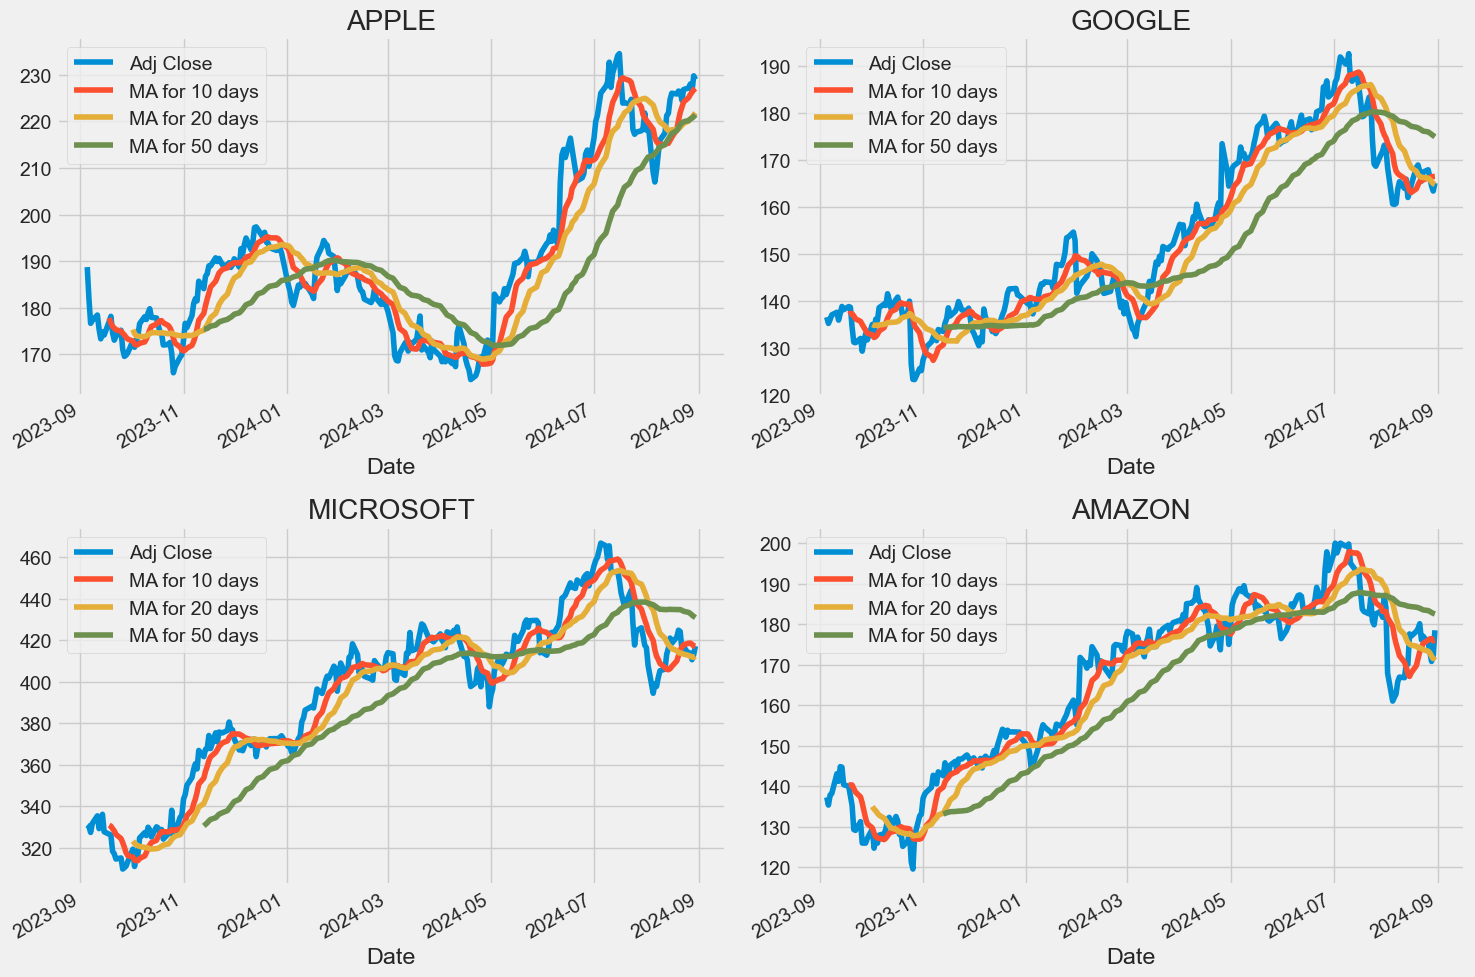

In [13]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 3. What was the daily return of the stock on average?¶
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

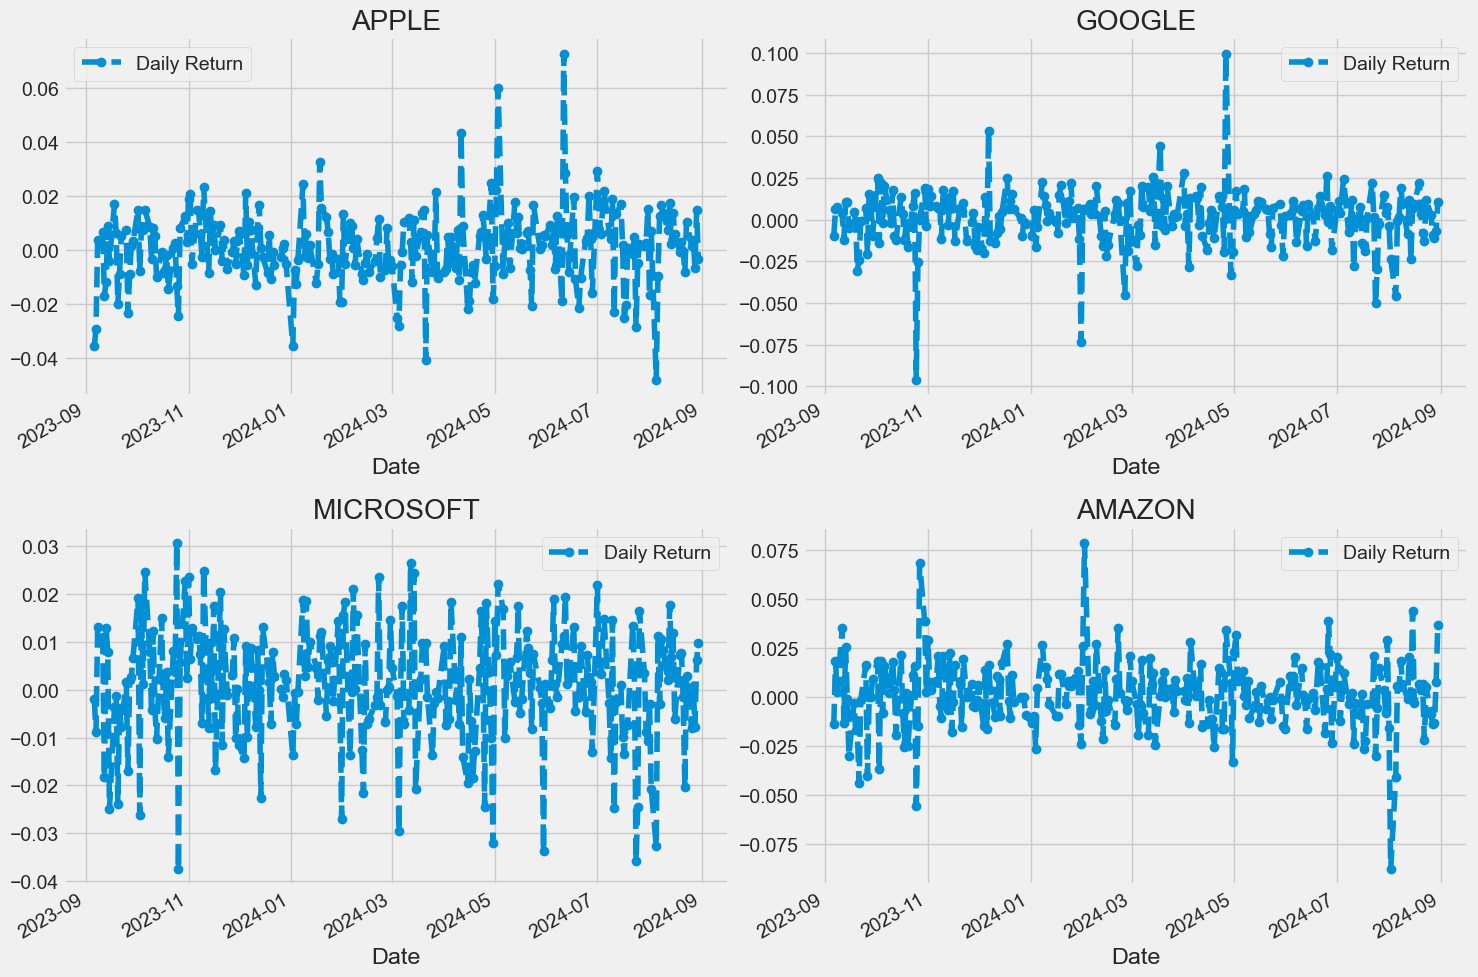

In [14]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

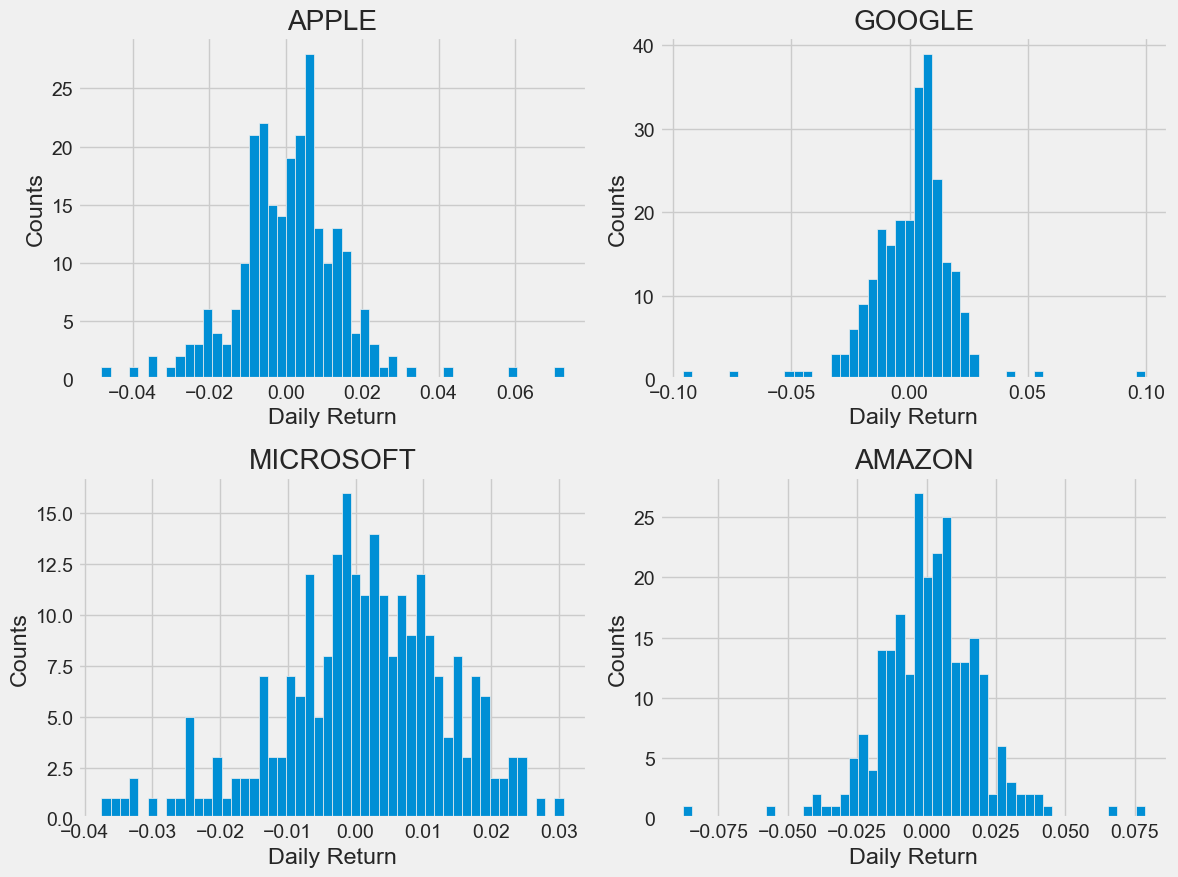

In [15]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## 4. What was the correlation between different stocks closing prices?

In [16]:

# Define the list of tech stocks and date range
tech_list = ["AAPL", "MSFT", "GOOG", "AMZN"]  # Replace with your actual tech stock list
start = "2023-01-01"
end = "2023-12-31"

# Fetch the adjusted closing prices for the tech stocks
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate the daily returns
tech_rets = closing_df.pct_change()

# Display the first few rows of the returns DataFrame
tech_rets.head()


[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-01-04 00:00:00+00:00,0.010314,-0.007924,-0.011037,-0.043743
2023-01-05 00:00:00+00:00,-0.010605,-0.023726,-0.021869,-0.029638
2023-01-06 00:00:00+00:00,0.036794,0.035611,0.016019,0.011785
2023-01-09 00:00:00+00:00,0.004089,0.014870,0.007259,0.009736


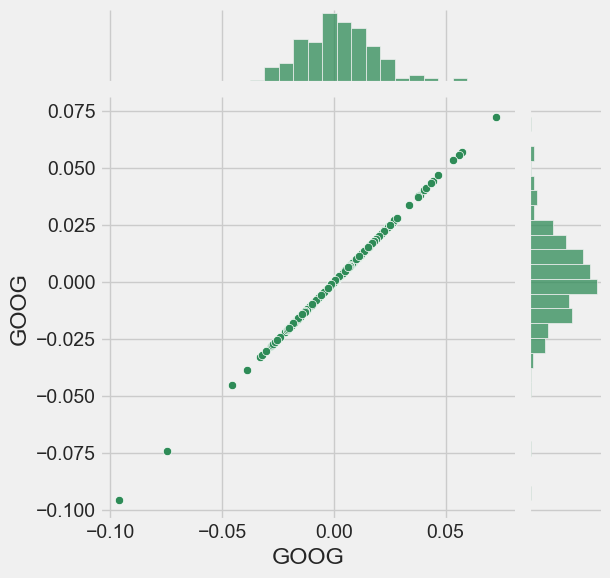

In [17]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

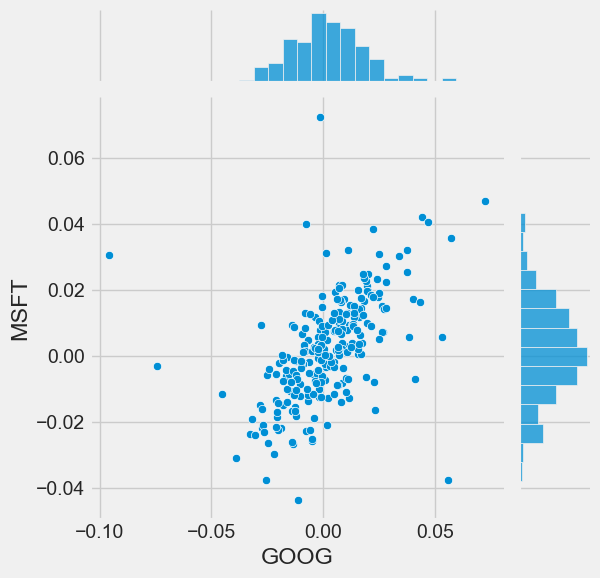

In [18]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

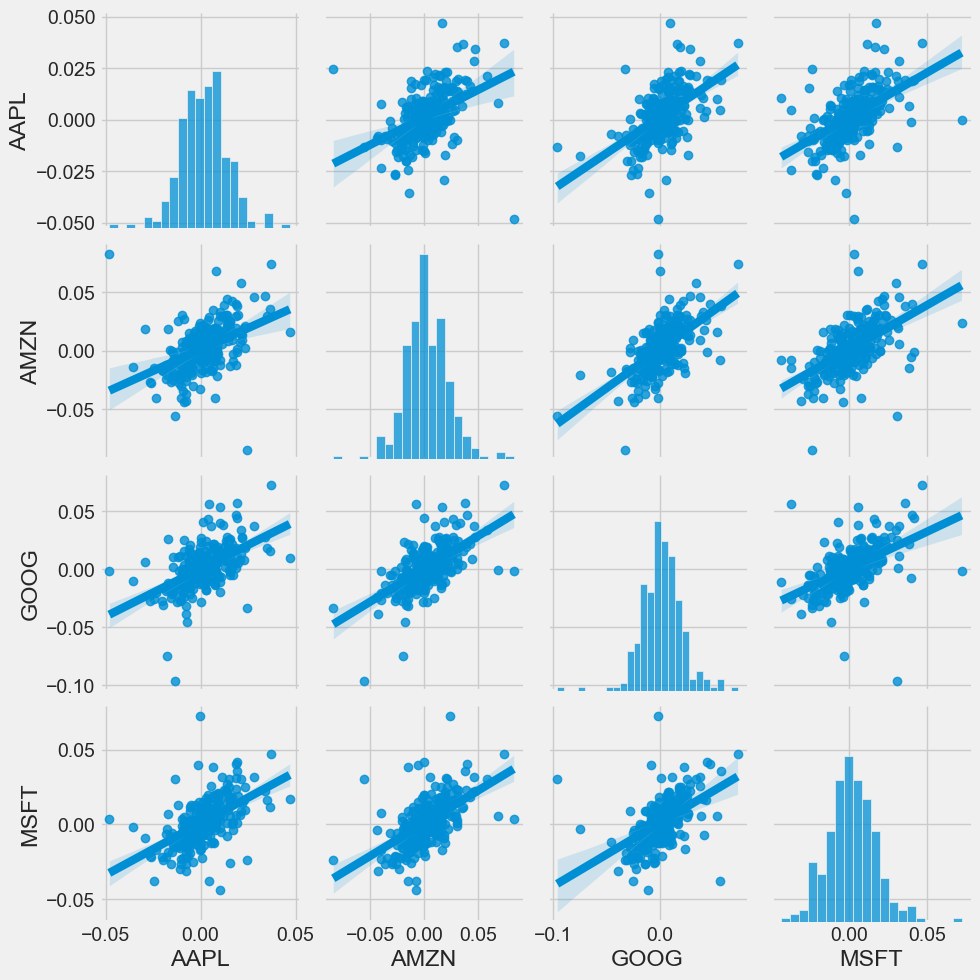

In [19]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

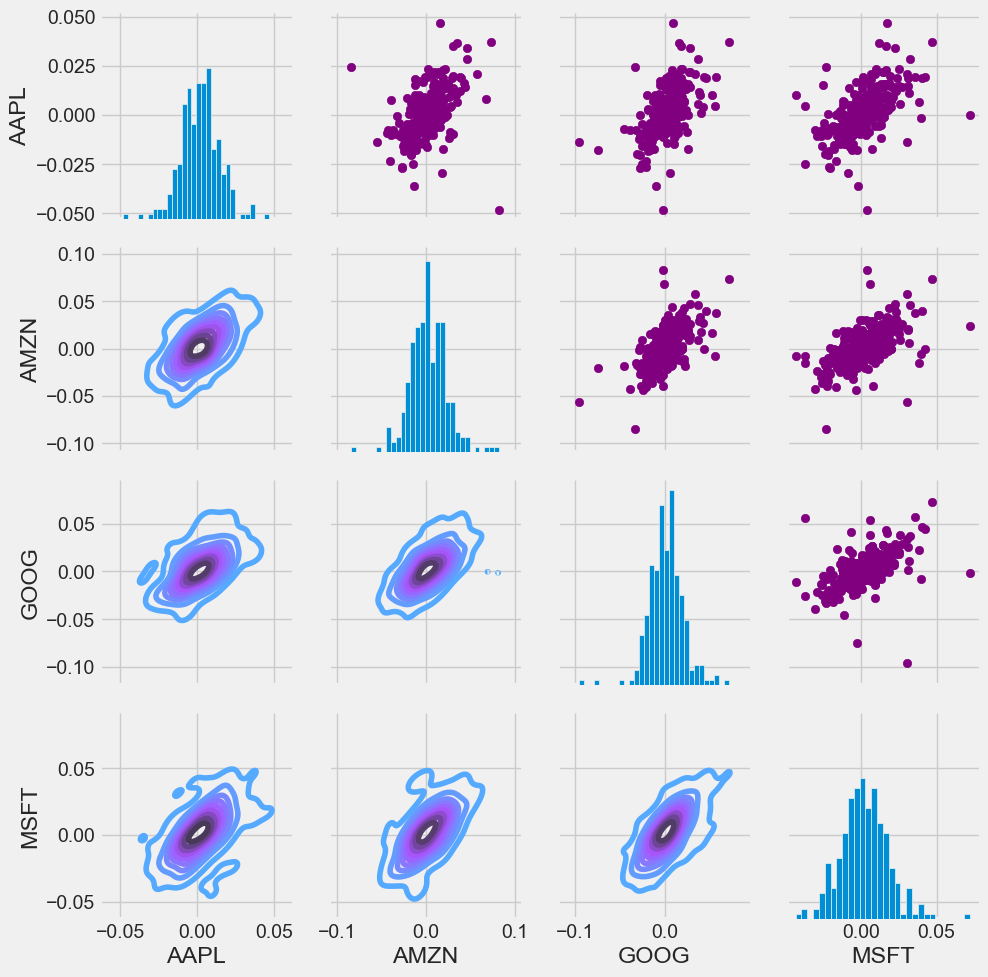

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

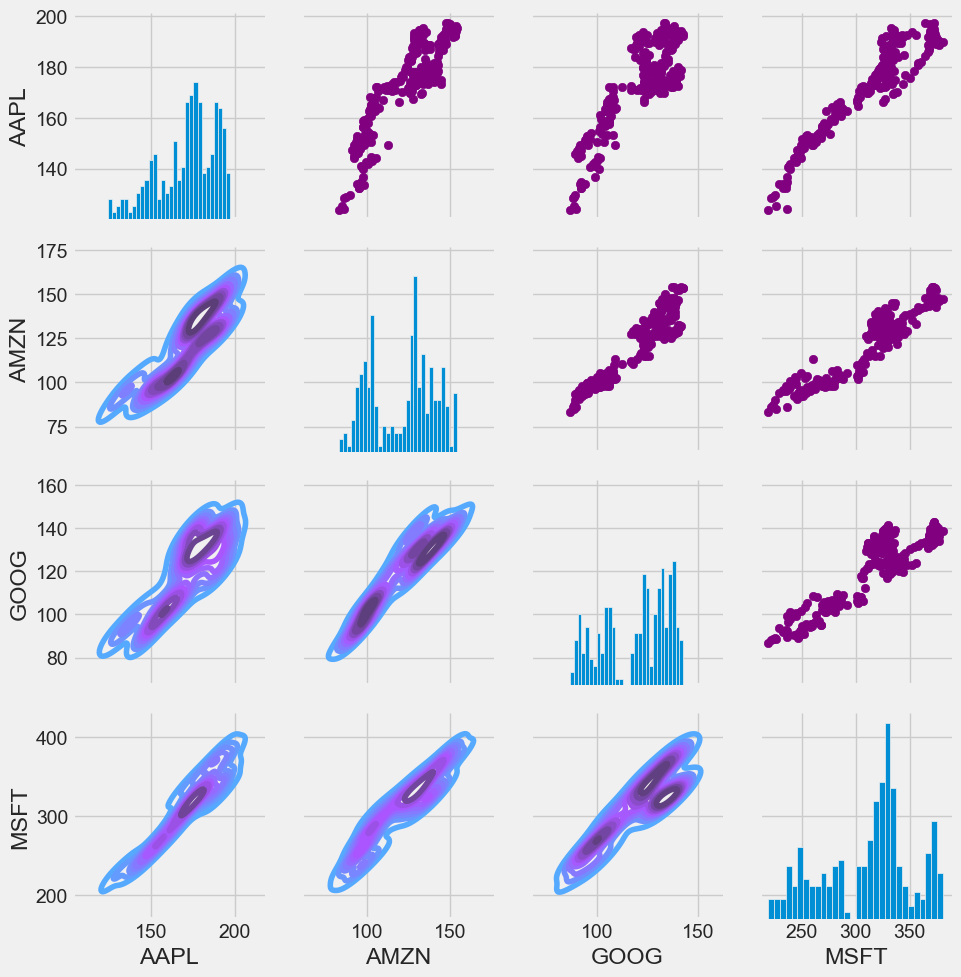

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

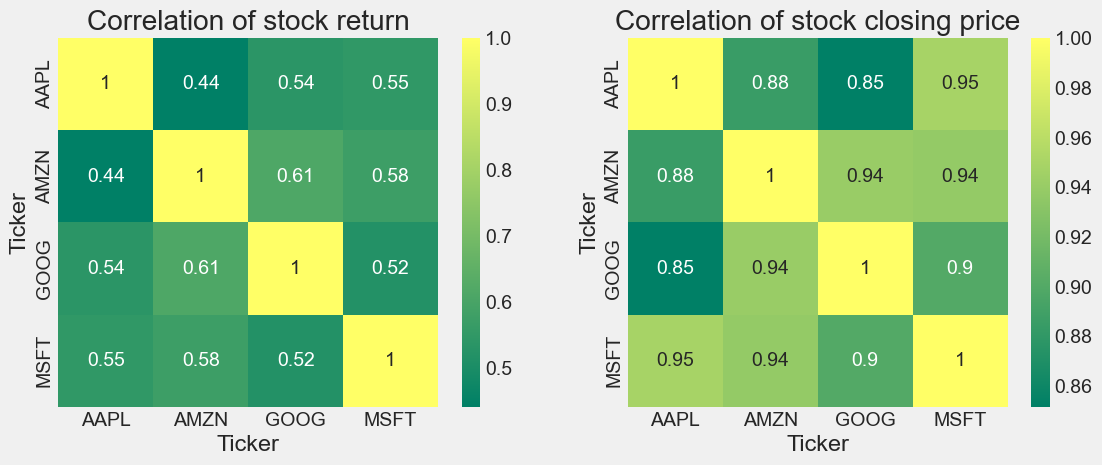

In [22]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

## 5. How much value do we put at risk by investing in a particular stock?¶
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

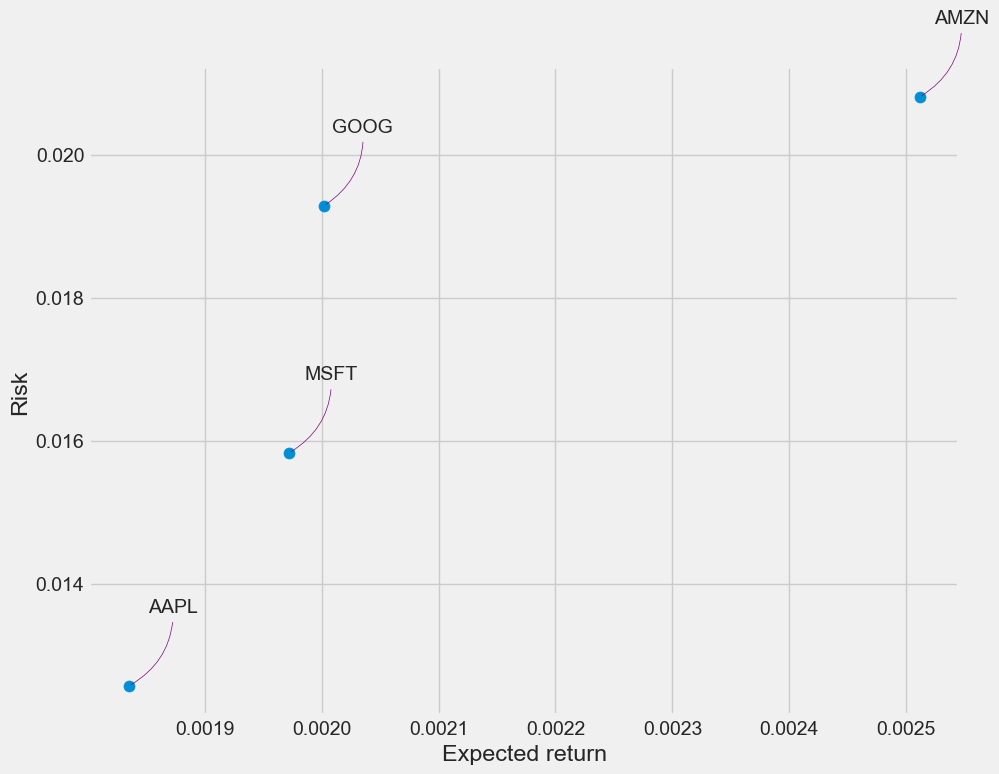

In [36]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='purple', connectionstyle='arc3,rad=-0.3'))

## 6. Predicting the closing price stock price of APPLE inc:

In [24]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [25]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402630,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469282,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607716,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739511,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400
...,...,...,...,...,...,...
2024-08-26,226.759995,227.279999,223.889999,227.179993,227.179993,30602200
2024-08-27,226.000000,228.850006,224.889999,228.029999,228.029999,35934600
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200


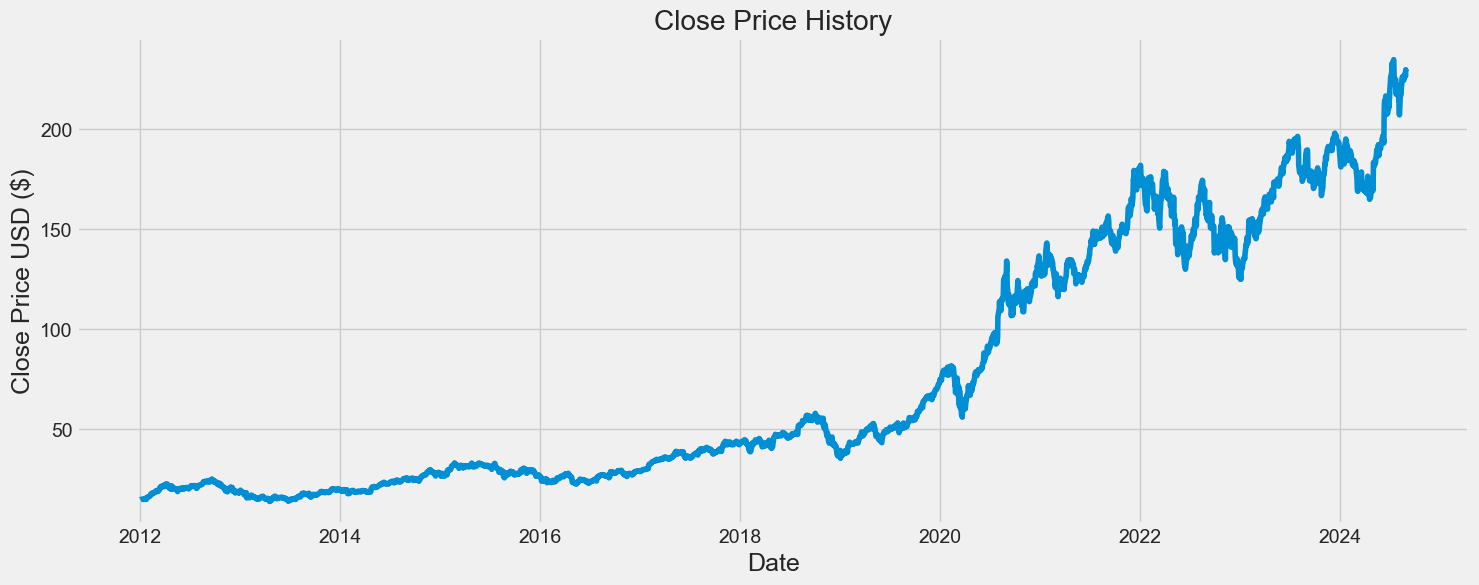

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3027

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.96228593],
       [0.97722662],
       [0.97364992]])

In [29]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2967/2967 ━━━━━━━━━━━━━━━━━━━━ 309s 98ms/step - loss: 0.0027


In [33]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 708ms/step


16.804109063192996

C:\Users\Pradyumn Sharma\AppData\Local\Temp\ipykernel_6560\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


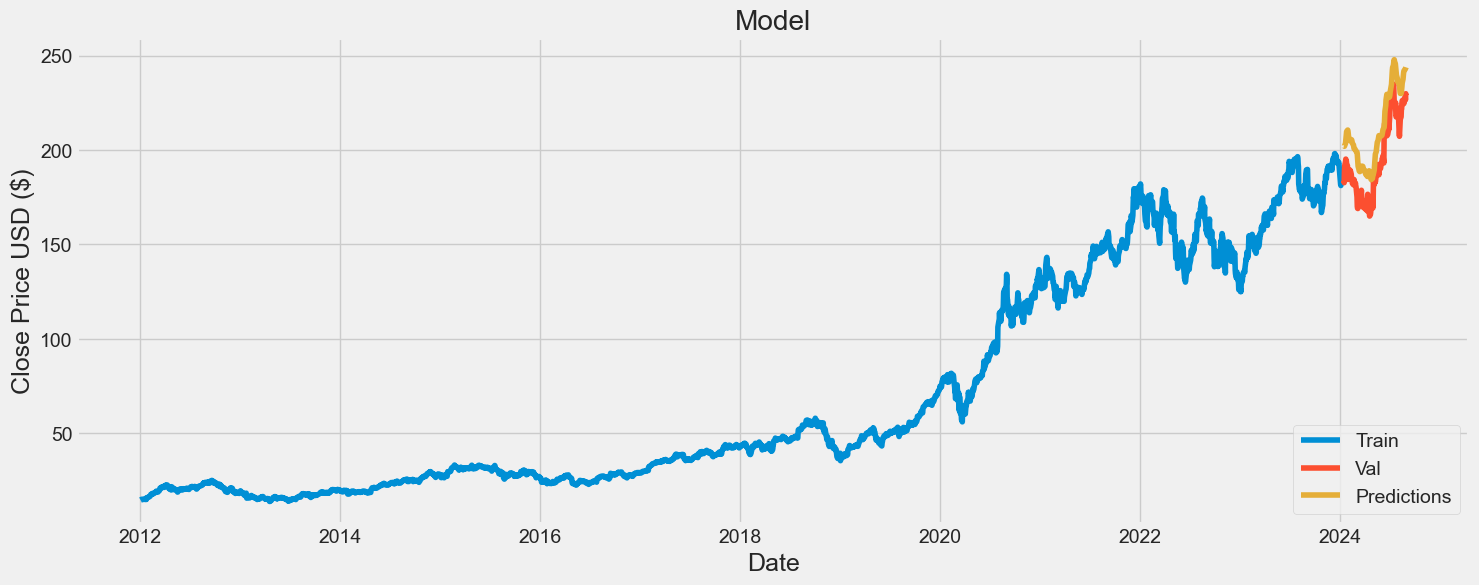

In [34]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2024-01-16,183.630005,202.266144
2024-01-17,182.679993,202.234024
2024-01-18,188.630005,201.947418
2024-01-19,191.559998,202.380417
2024-01-22,193.889999,203.484467
...,...,...
2024-08-26,227.179993,242.447693
2024-08-27,228.029999,242.788040
2024-08-28,226.490005,243.165222



In this notebook, you explored and analyzed stock market data.

- How to load stock market data from Yahoo Finance using the `yfinance` library.
- Techniques for exploring and visualizing time-series data using Pandas, Matplotlib, and Seaborn.
- Methods for assessing the correlation between different stocks.
- Approaches to evaluating the risk associated with investing in a particular stock.

If you have any questions, feel free to ask in the comments below, and I'll do my best to assist you.

### References:
- [Correlation in Finance](https://www.investopedia.com/terms/c/correlation.asp)
- Jose Portilla’s Udemy Course: *Learning Python for Data Analysis and Visualization*